## AnglePGAN Analysis

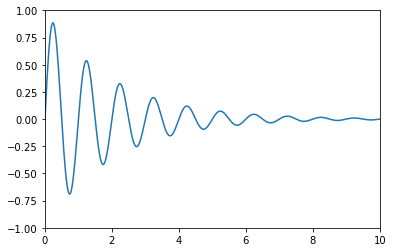

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


if __name__ == '__main__':
  x = np.arange(0, 10, 0.005)
  y = np.exp(-x/2.) * np.sin(2*np.pi*x)

  fig, ax = plt.subplots()
  ax.plot(x, y)
  ax.set_xlim(0, 10)
  ax.set_ylim(-1, 1)

  plt.show()

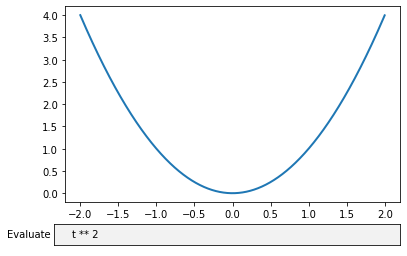

In [441]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(-2.0, 2.0, 0.001)
s = t ** 2
initial_text = "t ** 2"
l, = plt.plot(t, s, lw=2)


def submit(text):
    ydata = eval(text)
    l.set_ydata(ydata)
    ax.set_ylim(np.min(ydata), np.max(ydata))
    plt.draw()

axbox = plt.axes([0.1, 0.05, 0.8, 0.075])
text_box = TextBox(axbox, 'Evaluate', initial=initial_text)
text_box.on_submit(submit)

plt.show()


In [442]:
import os
import sys
import numpy as np
import h5py
#import cv2 

f = h5py.File('./Desktop/cern/data.h5','r')                    # load data into f variable
img = np.array(f.get('ECAL'))

In [443]:
real_s = np.load('./Desktop/cern/real_data.npy')
fake_s = np.load('./Desktop/cern/generated.npy')

In [444]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

In [445]:
real = real_s[25]
fake = fake_s[22]

In [446]:
fake[np.isnan(fake)] = 0

In [447]:
fake.shape

(51, 51, 25)

In [448]:
x2 = real[:, 0, 0]
y2 = real[0, :, 0]
z2 = real[0, 0, :]

x3 = fake[:, 0, 0]
y3 = fake[0, :, 0]
z3 = fake[0, 0, :]

print(x2.shape)
print(y2.shape)
print(z2.shape)

(51,)
(51,)
(25,)


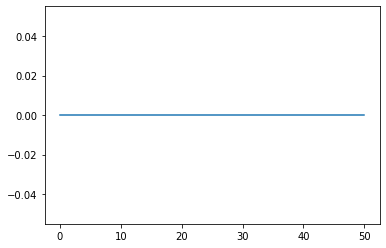

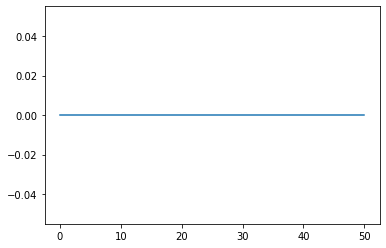

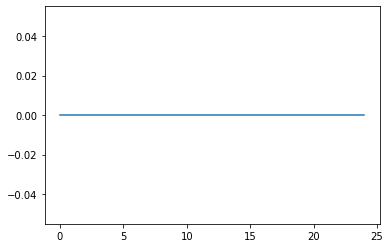

In [449]:
plt.plot(x2)
plt.show()
plt.plot(y2)
plt.show()
plt.plot(z2)
plt.show()

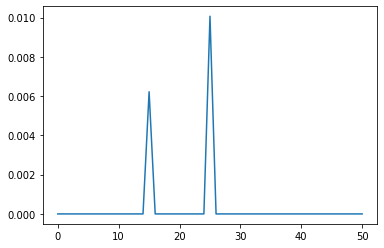

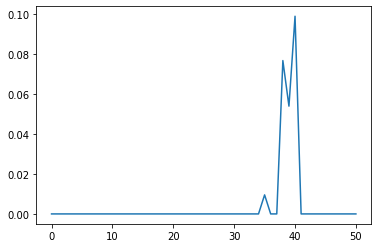

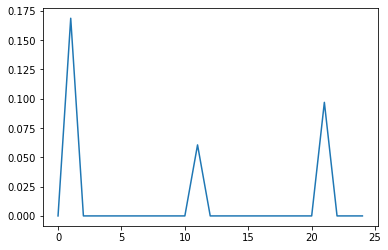

In [450]:
plt.plot(x3)
plt.show()
plt.plot(y3)
plt.show()
plt.plot(z3)
plt.show()

# Real Data

In [463]:
len(real[:,0])

51

In [465]:
real[:,0].shape

(51, 25)

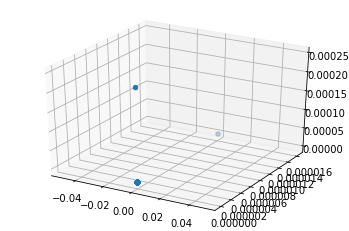

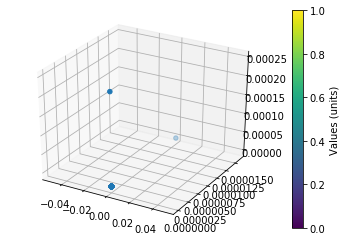

In [468]:
import numpy as np

x2=real[:,0]
y2=real[:,1]
z2=real[:,2]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2,y2,z2)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pnt3d=ax.scatter(x2,y2,z2)
cbar=plt.colorbar(pnt3d)
cbar.set_label("Values (units)")
plt.show()

# Fake Data

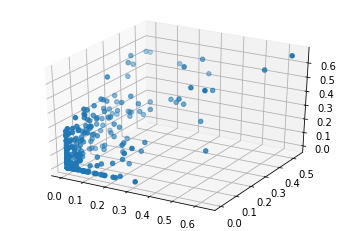

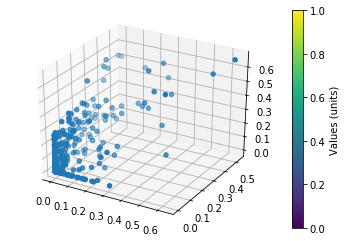

In [469]:
import numpy as np

x3=fake[:,0]
y3=fake[:,1]
z3=fake[:,2]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3,y3,z3)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pnt3d=ax.scatter(x3,y3,z3)
cbar=plt.colorbar(pnt3d)
cbar.set_label("Values (units)")
plt.show()

In [375]:
from PIL import Image
pic = Image.fromarray(test*255)
pic.show()

In [339]:
test = real[:,:,0]
test.shape

test2 = fake[:,:,0]
test2.shape

(51, 51)

# Normalization

In [377]:
# example of pixel normalization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('./Desktop/chat.jpg')
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


In [433]:
# example of global pixel standardization
from numpy import asarray
from PIL import Image
# load image
image = real_s
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 0.000, Standard Deviation: 0.001
Mean: -0.000, Standard Deviation: 1.000


In [432]:
pixels.std()

1.0000002

In [394]:
x4 = pixels[:, 0, 0]
y4 = pixels[0, :, 0]
z4 = pixels[0, 0, :]

print(x4.shape)
print(y4.shape)
print(z4.shape)

(51,)
(51,)
(25,)


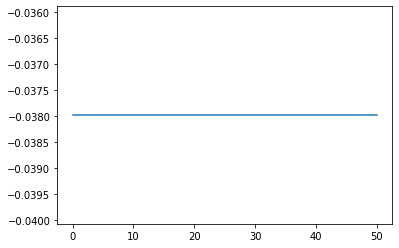

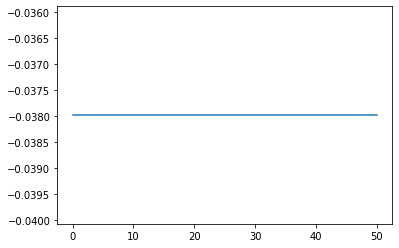

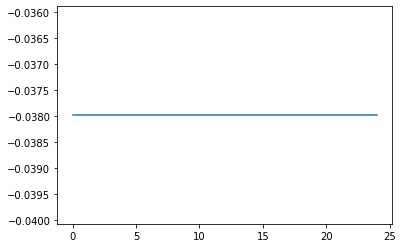

In [395]:
plt.plot(x4)
plt.show()
plt.plot(y4)
plt.show()
plt.plot(z4)
plt.show()

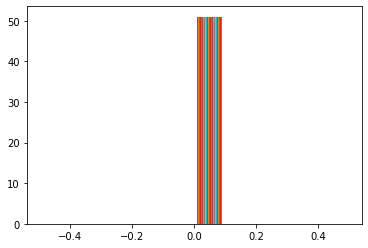

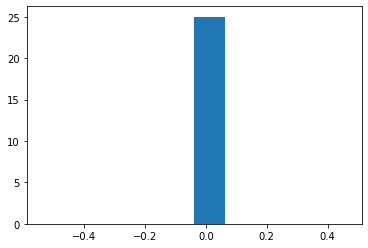

In [424]:
plt.hist(y2)
plt.show()

plt.hist(y4)
plt.show()

In [420]:
pixels.mean()

0.0

# ---------------------------------------------------------------------------------------------------------------

## Load the CERN (real) images

In [2]:
import numpy as np
import tensorflow as tf
from PIL import Image
import h5py
from numpy import asarray
import cv2

def GetDataAngle(datafile, imgs3dscale =1, imgs3dpower=1, e_pscale = 100, angscale=1, angtype='theta', thresh=1e-4):
    print ('Loading Data from .....', datafile)
    f = h5py.File(datafile,'r')                    # load data into f variable
    ang = np.array(f.get(angtype))                 # ang is an array of angle data from f, one value is concatenated onto the latent vector
    imgs3d = np.array(f.get('ECAL'))* imgs3dscale    # imgs3d is a 3d array, cut from the cylinder that the calorimeter produces -has 25 layers along z-axis
    e_p = np.array(f.get('energy'))/e_pscale       # e_p is an array of scaled energy data from f, one value is concatenated onto the latent vector
    imgs3d[imgs3d < thresh] = 0        # when imgs3d values are less than the threshold, they are reset to 0
    
    # set imgs3d, e_p, and ang as float 32 datatypes
    imgs3d = imgs3d.astype(np.float32)
    e_p = e_p.astype(np.float32)
    ang = ang.astype(np.float32)
    
    imgs3d = np.expand_dims(imgs3d, axis=-1)         # insert a new axis at the beginning for imgs3d
    
    # sum along axis
    ecal = np.sum(imgs3d, axis=(1, 2, 3))    # summed imgs3d data, used for training the discriminator
     
    # imgs3d ^ imgs3dpower
    if imgs3dpower !=1.:
        imgs3d = np.power(imgs3d, imgs3dpower)
            
    # imgs3d=ecal data; e_p=energy data; ecal=summed imgs3d (used to train the discriminator); ang=angle data
    return imgs3d, e_p, ang, ecal

In [3]:
real_imgs3d, e_p, ang, ecal = GetDataAngle('Ele_VarAngleMeas_100_200_000.h5')

Loading Data from ..... Ele_VarAngleMeas_100_200_000.h5


## Load the generated (fake) images

In [4]:
fake_imgs3d = np.load('generated.npy')
fake_imgs3d.shape

(32, 51, 51, 25)

# Function to plot the images of one type

In [51]:
# this function needs a 5000x[x,y,z,channel] numpy array fed in as 'imgs3d' (I used GetDataAngle() to prep it)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.ion()

def scatter3d(imgs3d, i, npy_format, threshold=.25, angle=0, color_name='plasma'):
    if npy_format==False:    #CERN format (5000,x,y,z,channel)
        img = imgs3d[i,:,:,:,0]
    else:   #.npy format of (32,x,y,z)
        img = imgs3d[i,:,:,:]
    
    x, y, z = np.where(img>threshold)
    values = img[x,y,z]
    #print(values)
        
    # plot 3d image
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # to see potential color schemes, visit https://matplotlib.org/stable/tutorials/colors/colormaps.html
    pnt3d = ax.scatter(x,y,z,c=values,cmap=plt.get_cmap(color_name))
  
    ax.view_init(angle)     # rotate the axes by the angle parameter
    cbar=plt.colorbar(pnt3d)
    cbar.set_label("Values (units)")
    plt.show()      
  

## plot real

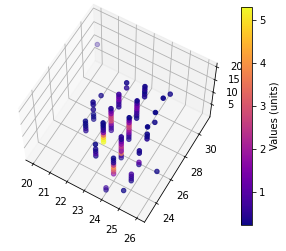

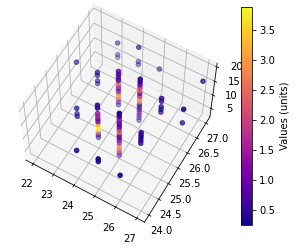

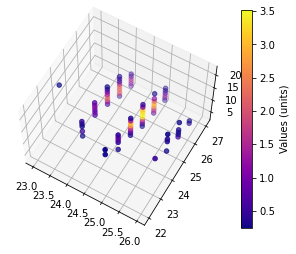

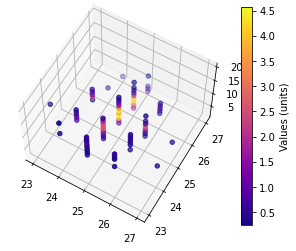

In [52]:
for i in np.arange(1000,5000,1000):
    scatter3d(real_imgs3d,i,False,0.25,60,'plasma')

## plot fake

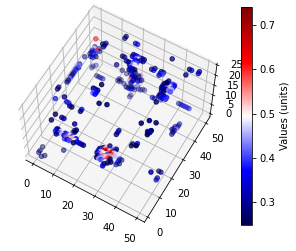

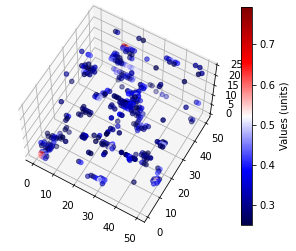

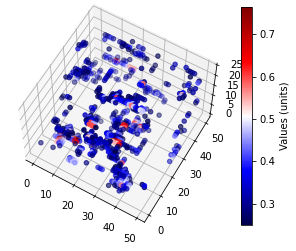

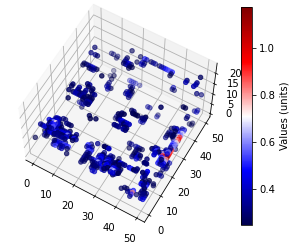

In [53]:
for i in np.arange(1,32,8):
    scatter3d(fake_imgs3d,i,True,0.25,60,'seismic')

# Function to plot both types of images, overlaid on top of each other

In [54]:
def scatter3d_both(real_imgs3d, fake_imgs3d, real_i, fake_i, threshold=.25, angle1=0, angle2=0, color_name_real='spring', color_name_fake='winter'):
    
    real_img = real_imgs3d[i,:,:,:,0]
    fake_img = fake_imgs3d[i,:,:,:]
    
    real_x, real_y, real_z = np.where(real_img>threshold)
    real_values = real_img[real_x,real_y,real_z]
    
    fake_x, fake_y, fake_z = np.where(fake_img>threshold)
    fake_values = fake_img[fake_x,fake_y,fake_z]    
        
    # plot the REAL (CERN) 3d image
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # to see potential color schemes, visit https://matplotlib.org/stable/tutorials/colors/colormaps.html
    real_pnt3d = ax.scatter(real_x,real_y,real_z,c=real_values,cmap=plt.get_cmap(color_name_real))
    ax.view_init(angle1,angle2)     # rotate the axes by the angle parameter
    cbar=plt.colorbar(real_pnt3d)
    cbar.set_label("Real (cern)")
    
    # plot the REAL (CERN) 3d image
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    # to see potential color schemes, visit https://matplotlib.org/stable/tutorials/colors/colormaps.html
    fake_pnt3d = ax.scatter(fake_x,fake_y,fake_z,c=fake_values,cmap=plt.get_cmap(color_name_fake))
    ax.view_init(angle1,angle2)     # rotate the axes by the angle parameter
    cbar=plt.colorbar(fake_pnt3d)
    cbar.set_label("Fake (pgan)")
    
    print(plt.isinteractive)
    plt.show()      
  

<function isinteractive at 0x000001CEFCAE3798>


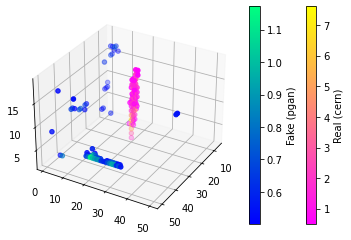

In [55]:
real_i = 4000
fake_i = 4

scatter3d_both(real_imgs3d, fake_imgs3d, real_i, fake_i, threshold=.5, angle1=30, angle2=30)

# --------------------------------------------------------------------------------------------------------------

## Example of Voxel Plotting

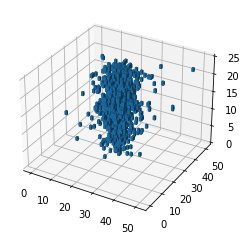

In [23]:
#voxel plotting
#https://matplotlib.org/3.2.2/gallery/mplot3d/voxels.html
#https://stackoverflow.com/questions/42611342/representing-voxels-with-matplotlib

for i in np.arange(2000,3000,1000):
    # prepare some coordinates
    img = real_imgs3d[i,:,:,:,0]
    
    #attempt to filter out low values -- can't figure it out with voxels :(
    #x,y,z = np.where(img>0.4)
    #img_filtered = img[img>-1].shape
    #values = img[x,y,z]
        
    # plot 3d image
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.voxels(img)#, facecolors=colors, edgecolor='k')
    #ax = fig.add_subplot(111, projection='3d')
    #pnt3d = ax.scatter(x,y,z,c=values)
    #cbar=plt.colorbar(pnt3d)
    plt.show()
    
